## Car Resale Value Prediction

### Problem Statement:
The dataset provides detailed information about used cars, including features such as mileage, engine size, and horsepower. The objective is to perform exploratory data analysis (EDA) and apply machine learning techniques to understand how these factors influence car resale value and to build predictive models for estimating resale prices.

### Objective

The main objective of this project is to analyze the car resale dataset using exploratory data analysis (EDA) techniques to identify key patterns and relationships between features such as mileage, engine size, and horsepower, and to build machine learning models that can accurately predict the resale value of cars.

### Columns in Car Resale Dataset:

● Car_Age → How old the car is, usually in years (calculated from the manufacturing year).<br>
● Mileage_km → The total distance the car has been driven, measured in kilometers.<br>
● Engine_Size_L → The size (capacity) of the car’s engine in liters (L). Bigger engines are usually more powerful but consume more fuel.<br>
● Horsepower → The power output of the engine, showing how strong and fast the car can be.<br>
● Previous_Owners → The number of people who have owned the car before (e.g., 1 = first-hand, 2 = second-hand).<br>
● Accidents → The number of accidents the car has been involved in (helps assess condition and resale value).<br>
● Resale_Price → The price at which the car is being resold in the used car market (this is your target variable for ML).

### Importing required libraries

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and Getting a Glimpse of the Dataset
The dataset available is in .xls format, so I will load the dataset in csv format to start data analysis.

In [4]:
#Importing required file
car=pd.read_csv(r"car_resale_value_datasettt.csv")

In [5]:
## exploring first five variables to identify anamolies in the data
car.head()

,Car_AGE,Mileage_km,Engine_Size_l,HORSEPOWER,PreviousOwners,ACCIDENTS,Resale_Price
0,7,171981.0,3.2,234,4,0,339043.5
1,15,225411.0,2.2,143,1,4,101762.5
2,11,24870.0,3.8,81,1,2,355626.0
3,8,170650.0,4.0,86,4,1,317127.0
4,7,208196.0,1.6,254,3,0,297412.0


In [6]:
## renaming some features to make it more readable feature names
car.rename(columns={"Car_AGE":"Car_Age",
                    "Engine_Size_l":"Engine_Size_Litre",
                    "HORSEPOWER":"Horse_Power",
                    "PreviousOwners":"Previous_Owners",
                    "ACCIDENTS":"Accidents"},inplace=True)


In [7]:
car.head()      #   # exploring first five variables to check renaming of features           

,Car_Age,Mileage_km,Engine_Size_Litre,Horse_Power,Previous_Owners,Accidents,Resale_Price
0,7,171981.0,3.2,234,4,0,339043.5
1,15,225411.0,2.2,143,1,4,101762.5
2,11,24870.0,3.8,81,1,2,355626.0
3,8,170650.0,4.0,86,4,1,317127.0
4,7,208196.0,1.6,254,3,0,297412.0


In [8]:
car.info()       # Checking the data types of each feature      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Age            500 non-null    int64  
 1   Mileage_km         475 non-null    float64
 2   Engine_Size_Litre  500 non-null    float64
 3   Horse_Power        500 non-null    int64  
 4   Previous_Owners    500 non-null    int64  
 5   Accidents          500 non-null    int64  
 6   Resale_Price       500 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


In [9]:
car.describe()          # Summary of Statistics

,Car_Age,Mileage_km,Engine_Size_Litre,Horse_Power,Previous_Owners,Accidents,Resale_Price
count,500.000000,475.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.616000,121629.170526,2.545200,230.224000,2.514000,2.046000,288077.290000
std,5.662922,70523.879172,0.870213,100.279718,1.150849,1.405644,122131.666926
min,1.000000,5404.000000,1.000000,60.000000,1.000000,0.000000,50000.000000
25%,4.750000,59527.500000,1.800000,144.750000,1.000000,1.000000,198527.750000
50%,9.000000,120359.000000,2.600000,223.000000,2.000000,2.000000,288446.250000
75%,15.000000,176449.000000,3.300000,324.250000,4.000000,3.000000,383472.375000
max,19.000000,249820.000000,4.000000,399.000000,4.000000,4.000000,539466.000000


In [10]:
car.isnull().sum()     #checking missing values 

Car_Age               0
Mileage_km           25
Engine_Size_Litre     0
Horse_Power           0
Previous_Owners       0
Accidents             0
Resale_Price          0
dtype: int64

There are Missing Values in Mileage_km

In [11]:
#filling the missing values by mean
car["Mileage_km"] = car["Mileage_km"].fillna(car["Mileage_km"].mean())

In [12]:
car.head()

,Car_Age,Mileage_km,Engine_Size_Litre,Horse_Power,Previous_Owners,Accidents,Resale_Price
0,7,171981.0,3.2,234,4,0,339043.5
1,15,225411.0,2.2,143,1,4,101762.5
2,11,24870.0,3.8,81,1,2,355626.0
3,8,170650.0,4.0,86,4,1,317127.0
4,7,208196.0,1.6,254,3,0,297412.0


## Exploratory Data Analysis

### Univariate Analysis of each feature

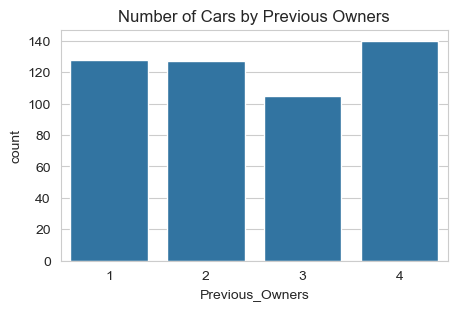

In [13]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x="Previous_Owners",data=car)
plt.title("Number of Cars by Previous Owners")
plt.show()

There is a slight increase in cars with more previous owners, especially 4 owners.

<Axes: xlabel='Car_Age'>

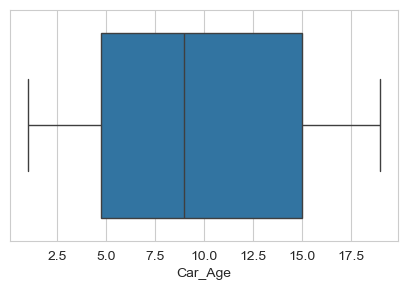

In [14]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.boxplot(x="Car_Age",data=car)

There is no outlier in this column

<Axes: xlabel='Accidents', ylabel='count'>

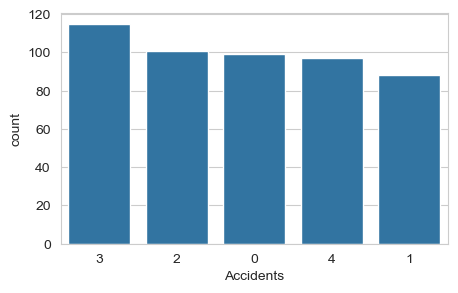

In [15]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x="Accidents",data=car, order = car['Accidents'].value_counts(ascending=False).index)

Most of the car in the dataset have been involved in 3 accidents

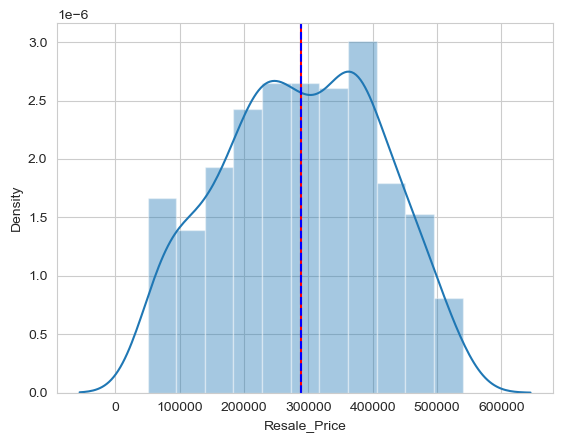

In [16]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(car['Resale_Price'])
plt.axvline(car['Resale_Price'].mean(), color = 'red', label = 'Mean')
plt.axvline(car['Resale_Price'].median(), color = 'blue', ls = '--', label = 'Median')
plt.show()

The resale price distribution is approximately symmetric ,with the mean and median being nearly equal

## Bivariate and Multivariate analysis

In [17]:
# Calculating the correlation between columns.
car.corr()

,Car_Age,Mileage_km,Engine_Size_Litre,Horse_Power,Previous_Owners,Accidents,Resale_Price
Car_Age,1.000000,-0.016459,0.061763,0.047182,0.012204,-0.036044,-0.910035
Mileage_km,-0.016459,1.000000,-0.013436,0.024966,-0.026558,0.026591,-0.264324
Engine_Size_Litre,0.061763,-0.013436,1.000000,0.083344,0.038387,0.059406,0.153877
Horse_Power,0.047182,0.024966,0.083344,1.000000,-0.063565,0.023072,0.049609
Previous_Owners,0.012204,-0.026558,0.038387,-0.063565,1.000000,-0.020839,-0.137490
Accidents,-0.036044,0.026591,0.059406,0.023072,-0.020839,1.000000,-0.070360
Resale_Price,-0.910035,-0.264324,0.153877,0.049609,-0.137490,-0.070360,1.000000


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

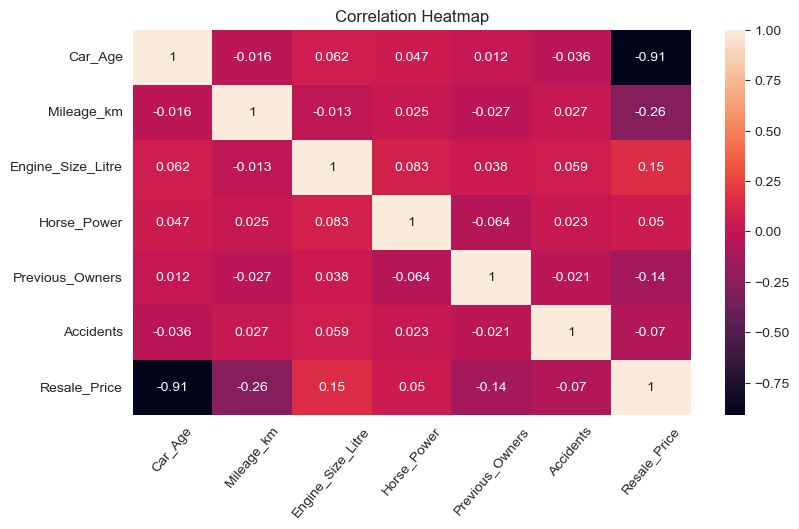

In [18]:
# Calculating the correlation between columns with the help of heatmap for better understanding.
plt.figure(figsize=(9,5))
sns.heatmap(car.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=50)
plt.plot

• Strong negative correlation: Car_Age vs Resale_Price<br>
• Weak positive correlations: Engine_Size_Litre vs Resale_Price<br>
• Most other features (Accidents, Horse_Power) have very weak correlations with resale price.

## Feature Scaling
### Splitting the dataset into the Training set and Test set

In [19]:
X=car[['Car_Age','Mileage_km','Engine_Size_Litre','Horse_Power','Previous_Owners','Accidents']]
Y=car[['Resale_Price']]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=1)   
# test_size 0.25 means 25 percent of data will be in test
#random_state ensures that the random processes produce the same results every time you run the code.

In [21]:
# Checking the shape of Train and Test data
print("train data shape of x:",X_train.shape)
print("test data shape of x:",X_test.shape)
print("train data shape of y:",Y_train.shape)
print("test data shape of y:",Y_test.shape)

train data shape of x: (375, 6)
test data shape of x: (125, 6)
train data shape of y: (375, 1)
test data shape of y: (125, 1)


In [22]:
#It ensures that all features contribute equally to the model
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train_scaled = ss.fit_transform(X_train)          # fit will calculate mean and sd
X_test_scaled = ss.transform(X_test)                # Here we will use only transform method as test data set is like new dataset

In [23]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
model= LinearRegression()             # Creating a Linear regression object
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [24]:
print(model.score(X_train_scaled,Y_train))        #checking the accuracy of the model

0.9865532866830781


The model has an Accuracy of 0.9866 on training data, meaning it fits the data very well.

In [25]:
from sklearn.metrics import r2_score
prediction=model.predict(X_test_scaled)
print(r2_score(Y_test,prediction))

0.9898888538575635


The model is performing extremely well on the test data.<br>
Predictions are very close to the actual values.

In [32]:
Y_test["Resale_Price"]
result = Y_test
result.head()

,Resale_Price
304,178890.0
340,50000.0
47,350423.0
67,156023.0
479,399472.5


In [33]:
result = result.reset_index()
result.head()

,index,Resale_Price
0,304,178890.0
1,340,50000.0
2,47,350423.0
3,67,156023.0
4,479,399472.5


In [41]:
result["prediction_of_sales"] = prediction  # if prediction is 1D
result.head()

,Resale_Price,prediction_of_sales
0,178890.0,170004.566348
1,50000.0,-2255.213379
2,350423.0,359401.900861
3,156023.0,147680.646355
4,399472.5,386738.031568


In [42]:
error=result["Resale_Price"]-result["prediction_of_sales"] 
error.head()

0     8885.433652
1    52255.213379
2    -8978.900861
3     8342.353645
4    12734.468432
dtype: float64

In [43]:
from sklearn.metrics import r2_score
prediction=model.predict(X_test_scaled)
print(r2_score(result["Resale_Price"],result["prediction_of_sales"] ))

0.9898888538575635


## Conclusion:

The car resale value prediction model works very well and gives accurate results.
It can help buyers know a fair price before buying a used car and help sellers set the right price when selling.
This makes the process easier, faster, and more reliable for everyone in the used car market.

## Future Scope:
The model can be improved by using more data and adding new features like mileage, service history, or market trends.
In the future, it can also be developed into a mobile or web app so that anyone can easily check the resale value of their car.